<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/1_0_%D0%93%D1%80%D0%B0%D1%84%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Графы

Графы играют ключевую роль в анализе данных. Граф $G = (V, E)$ состоит из множества вершин $V = \{v_1, \dots, v_n\}$ и множества рёбер $E \subseteq V \times V$. Ребро $(i, j) \in E$ существует, если вершины $v_i$ и $v_j$ соединены. Одним из излюбленных примеров в теории графов является граф Петерсена[^1]:


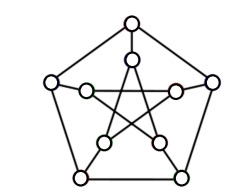


Рисунок 1: Граф Петерсена

Графы являются важным инструментом во многих областях, поскольку многие сложные явления можно представить через попарные взаимодействия между объектами (или точками данных), которые удобно моделировать с помощью графов.

Напомним некоторые основные понятия о графах, которые нам понадобятся.

### Основные понятия о графах

1. **Связность графа**:  
   Граф называется **связным**, если для любой пары вершин существует путь, соединяющий их. Количество **компонент связности** графа — это минимальное число подграфов, на которые можно разбить граф так, чтобы каждый подграф был связным. Граф Петерсена является связным, поэтому он имеет только одну компоненту связности.

2. **Клика**:  
   **Кликой** графа $G$ называется подмножество вершин $S \subseteq V$, такое что подграф, порождённый $S$, является полным. Иными словами, $S$ — это клика, если каждая пара вершин в $S$ соединена ребром. **Число клики** $c(G)$ — это размер наибольшей клики в графе $G$. Например, граф Петерсена имеет число клики, равное 2.

3. **Независимое множество**:  
   **Независимым множеством** графа $G$ называется подмножество вершин $S \subseteq V$, такое что никакие две вершины в $S$ не соединены ребром. Это эквивалентно клике в дополнении графа $G^c = (V, E^c)$, где $E^c$ — множество рёбер, отсутствующих в $G$. **Число независимости** графа $G$ — это размер наибольшего независимого множества. В графе Петерсена число независимости равно 4.

[^1]: Граф Петерсена часто используется в теории графов как контрпример.



### Матричное представление графов

Одним из наиболее полезных способов представления графа является его **матрица смежности**. Для графа $G = (V, E)$ с $n$ вершинами ($|V| = n$) матрица смежности $A \in \mathbb{R}^{n \times n}$ определяется как симметричная матрица с элементами:

$$
A_{ij} =
\begin{cases}
1, & \text{если } (i, j) \in E, \\
0, & \text{если } (i, j) \notin E.
\end{cases}
$$

Для неориентированных графов матрица смежности симметрична ($A_{ij} = A_{ji}$), а диагональные элементы $A_{ii}$ обычно равны 0 (если в графе нет петель).






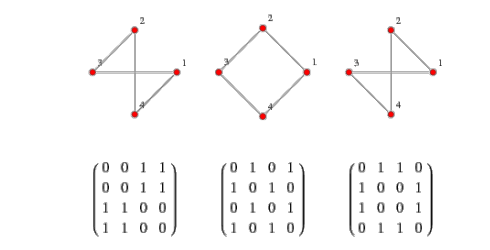

Рисунок 2: Примеры графов и их матриц смежности

### Взвешенные графы

Иногда рассматривают **взвешенные графы** $G = (V, E, W)$, где каждому ребру $(i, j)$ приписан вес $w_{ij}$. Веса предполагаются неотрицательными ($w_{ij} \geq 0$) и симметричными ($w_{ij} = w_{ji}$). Если вершины не соединены, то $w_{ij} = 0$, а $w_{ii} = 0$ для всех $i$. Неориентированные графы можно рассматривать как частный случай взвешенных графов, где $w_{ij} = 1$, если вершины соединены, и $w_{ij} = 0$ в противном случае.



### Степень вершины и матрица степеней

**Степень вершины** $v_i \in V$ в взвешенном графе определяется как сумма весов рёбер, инцидентных этой вершине:

$$
d_i = \sum_{j=1}^n w_{ij}.
$$

**Матрица степеней** $D$ — это диагональная матрица, элементы которой равны степеням вершин:

$$
D = \text{diag}(d_1, d_2, \dots, d_n).
$$



### Матрица инцидентности

**Матрица инцидентности** $\nabla$ — это матрица размера $|E| \times |V|$, определяемая следующим образом:

$$
\nabla_{ev} =
\begin{cases}
-1, & \text{если вершина } v \text{ является началом ребра } e, \\
1, & \text{если вершина } v \text{ является концом ребра } e, \\
0, & \text{если вершина } v \text{ не инцидентна ребру } e.
\end{cases}
$$

Для неориентированных графов ориентация рёбер выбирается произвольно, но фиксируется.



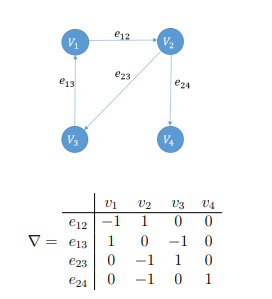



### Лапласиан графа


Пусть $f$ — функция, определённая на вершинах графа. Тогда оператор градиента $\nabla f$ определяется следующим образом:

$$
(\nabla f)_{i,j} = f(v_j) - f(v_i),
$$

где $i, j$ соответствуют вершинам, соединённым ребром. Таким образом, $\nabla$ действует как оператор разности на графе.

**Ненормированный лапласиан графа** $L$ определяется как:

$$
L := \nabla^T \nabla.
$$

Нетрудно показать, что $L$ также может быть выражен через матрицу степеней $D$ и матрицу смежности $A$:

$$
L = D - A,
$$

где $D$ — матрица степеней, а $A$ — матрица смежности графа.


Для того же примера, рассмотрим следующие матрицы:

- **Матрица степеней $D$**:
  $$
  D =
  \begin{bmatrix}
  2 & 0 & 0 & 0 \\
  0 & 3 & 0 & 0 \\
  0 & 0 & 2 & 0 \\
  0 & 0 & 0 & 1
  \end{bmatrix}.
 $$

- **Матрица смежности $A$**:
  $$
  A =
  \begin{bmatrix}
  0 & 1 & 1 & 0 \\
  1 & 0 & 1 & 1 \\
  1 & 1 & 0 & 0 \\
  0 & 1 & 0 & 0
  \end{bmatrix}.
 $$

- **Лапласиан $L = D - A$**:
  $$
  L =
  \begin{bmatrix}
  2 & -1 & -1 & 0 \\
  -1 & 3 & -1 & -1 \\
  -1 & -1 & 2 & 0 \\
  0 & -1 & 0 & 1
  \end{bmatrix}.
 $$

Эту матрицу $L$ также можно получить напрямую как $L = \nabla^T \nabla$.

Иногда лапласиан $L$ определяется непосредственно как $L = D - A$. Для **взвешенных графов**, где рёбра имеют веса $w_{ij}$, лапласиан определяется следующим образом:

$$
L = D - W,
$$

где $W$ — взвешенная матрица смежности с элементами $w_{ij}$.





### Свойства лапласиана графа

### Теорема 1 (Свойство лапласиана графа)

Для любого вектора $f \in \mathbb{R}^n$ выполняется следующее равенство:

$$
f^T L f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} (f_i - f_j)^2,
$$

где $L = D - W$ — лапласиан графа, $D$ — матрица степеней, $W$ — матрица весов, $f_i$ — значение функции $f$ на вершине $v_i$, а $w_{ij}$ — вес ребра между вершинами $v_i$ и $v_j$.



### Доказательство

1. **Выразим $f^T L f$ через матрицы $D$ и $W$:**

   Лапласиан графа определяется как $L = D - W$. Подставим это в выражение $f^T L f$:

$$
   f^T L f = f^T (D - W) f.
$$

   Раскроем скобки:

$$
   f^T L f = f^T D f - f^T W f.
$$

2. **Разберём каждое слагаемое отдельно:**

   - **Первое слагаемое: $f^T D f$.**

     Матрица $D$ — диагональная, и её элементы равны степеням вершин $d_i = \sum_{j=1}^n w_{ij}$. Поэтому:

$$
     f^T D f = \sum_{i=1}^n d_i f_i^2.
$$

Подставим выражение для $d_i$:

$$
     f^T D f = \sum_{i=1}^n \left( \sum_{j=1}^n w_{ij} \right) f_i^2.
$$

   - **Второе слагаемое: $f^T W f$.**

     Матрица $W$ — это матрица весов, и её элементы $w_{ij}$ равны весу ребра между вершинами $v_i$ и $v_j$. Поэтому:

$$
     f^T W f = \sum_{i,j=1}^n w_{ij} f_i f_j.
$$

3. **Объединим оба слагаемых:**

   Подставим выражения для $f^T D f$ и $f^T W f$ обратно в формулу для $f^T L f$:

$$
   f^T L f = \sum_{i=1}^n \left( \sum_{j=1}^n w_{ij} \right) f_i^2 - \sum_{i,j=1}^n w_{ij} f_i f_j.
$$

4. **Преобразуем выражение:**

   Заметим, что двойная сумма $\sum_{i,j=1}^n w_{ij} f_i^2$ эквивалентна сумме $\sum_{i=1}^n \left( \sum_{j=1}^n w_{ij} \right) f_i^2$, так как $w_{ij}$ не зависит от $f_i$. Поэтому:

$$
   f^T L f = \sum_{i,j=1}^n w_{ij} f_i^2 - \sum_{i,j=1}^n w_{ij} f_i f_j.
$$

   Вынесем $w_{ij}$ за скобки:

$$
   f^T L f = \sum_{i,j=1}^n w_{ij} (f_i^2 - f_i f_j).
$$

5. **Добавим симметричное слагаемое:**

   Заметим, что $f_i^2 - f_i f_j = f_i (f_i - f_j)$. Однако для симметричности добавим и вычтем $f_j^2$:

$$
   f_i^2 - f_i f_j = \frac{1}{2} (f_i^2 - 2 f_i f_j + f_j^2) + \frac{1}{2} (f_i^2 - f_j^2).
$$

   Первое слагаемое $\frac{1}{2} (f_i^2 - 2 f_i f_j + f_j^2)$ — это $\frac{1}{2} (f_i - f_j)^2$, а второе слагаемое $\frac{1}{2} (f_i^2 - f_j^2)$ при суммировании по всем $i, j$ даст ноль, так как $w_{ij} = w_{ji}$. Поэтому:

$$
   f^T L f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} (f_i - f_j)^2.
$$



### Итог

Мы доказали, что для любого вектора $f \in \mathbb{R}^n$ выполняется равенство:

$$
f^T L f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} (f_i - f_j)^2.
$$

Это равенство показывает, что лапласиан графа $L$ измеряет "гладкость" функции $f$ на графе. Если значения $f_i$ и $f_j$ сильно отличаются для вершин, соединённых рёбрами с большими весами, то $f^T L f$ будет большим. Если же функция $f$ "гладкая" (то есть $f_i \approx f_j$ для соединённых вершин), то $f^T L f$ будет близко к нулю.



### Пример для понимания

Рассмотрим простой граф с тремя вершинами и рёбрами с весами $w_{12} = 1$, $w_{23} = 1$, $w_{13} = 0$. Пусть $f = [1, 2, 3]^T$. Тогда:

1. Матрица степеней $D$:

$$
   D =
   \begin{bmatrix}
   1 & 0 & 0 \\
   0 & 2 & 0 \\
   0 & 0 & 1
   \end{bmatrix}.
$$

2. Матрица весов $W$:

$$
   W =
   \begin{bmatrix}
   0 & 1 & 0 \\
   1 & 0 & 1 \\
   0 & 1 & 0
   \end{bmatrix}.
$$

3. Лапласиан $L = D - W$:

$$
   L =
   \begin{bmatrix}
   1 & -1 & 0 \\
   -1 & 2 & -1 \\
   0 & -1 & 1
   \end{bmatrix}.
$$

4. Вычислим $f^T L f$:

$$
   f^T L f = [1, 2, 3]
   \begin{bmatrix}
   1 & -1 & 0 \\
   -1 & 2 & -1 \\
   0 & -1 & 1
   \end{bmatrix}
   \begin{bmatrix}
   1 \\
   2 \\
   3
   \end{bmatrix}.
$$

   После умножения получим:

$$
   f^T L f = (1 \cdot 1 + (-1) \cdot 2 + 0 \cdot 3) \cdot 1 + ((-1) \cdot 1 + 2 \cdot 2 + (-1) \cdot 3) \cdot 2 + (0 \cdot 1 + (-1) \cdot 2 + 1 \cdot 3) \cdot 3.
$$

   Упростим:

$$
   f^T L f = (1 - 2) \cdot 1 + (-1 + 4 - 3) \cdot 2 + (-2 + 3) \cdot 3 = (-1) \cdot 1 + 0 \cdot 2 + 1 \cdot 3 = -1 + 0 + 3 = 2.
$$

5. Проверим по формуле (1):

$$
   \frac{1}{2} \sum_{i,j=1}^3 w_{ij} (f_i - f_j)^2 = \frac{1}{2} \left( 1 \cdot (1-2)^2 + 1 \cdot (2-3)^2 \right) = \frac{1}{2} (1 + 1) = 1.
$$

   Здесь мы видим, что результат совпадает с вычислением через $f^T L f$, что подтверждает теорему.



Таким образом, теорема доказана, и её смысл проиллюстрирован на примере.


Реализуем этот пример на Python с подробными вычислениями и визуализацией. Мы будем использовать библиотеки numpy для работы с матрицами и matplotlib для визуализации.



In [ ]:
!pip install networkx

Лапласиан L:
 [[ 1 -1  0]
 [-1  2 -1]
 [ 0 -1  1]]
f^T L f = 2
Проверка по формуле (1): 2.0


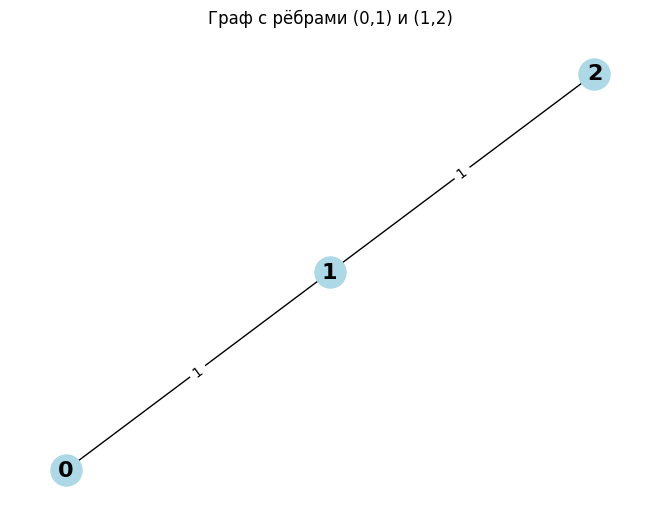

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задаём вектор f
f = np.array([1, 2, 3])

# Матрица степеней D
D = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 1]])

# Матрица весов W
W = np.array([[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]])

# Лапласиан L = D - W
L = D - W
print("Лапласиан L:\n", L)

# Вычисляем f^T L f
fT_L_f = f.T @ L @ f
print("f^T L f =", fT_L_f)

# Проверка по формуле (1)
sum_w_ij = 0
for i in range(3):
    for j in range(3):
        if W[i, j] > 0:  # Учитываем только существующие рёбра
            sum_w_ij += W[i, j] * (f[i] - f[j])**2
result = 0.5 * sum_w_ij
print("Проверка по формуле (1):", result)

# Визуализация графа
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 1), (1, 2, 1)])  # Рёбра (0,1) и (1,2) с весом 1

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Граф с рёбрами (0,1) и (1,2)")
plt.show()





### 2. Свойства лапласиана графа

Лапласиан графа $L$ обладает следующими важными свойствами:

1. **Симметричность и положительная полуопределённость**:
- Лапласиан $L$ является симметричной матрицей, так как $L = D - W$, где $D$ — диагональная матрица, а $W$ — симметричная матрица весов.
- Лапласиан $L$ является положительно полуопределённой матрицей. Это следует из равенства (1), которое показывает, что для любого вектора $f \in \mathbb{R}^n$:

$$
 f^T L f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} (f_i - f_j)^2 \geq 0.
$$

2. **Собственное значение 0**:
- Число $0$ является собственным значением лапласиана $L$, и соответствующий собственный вектор — это вектор $\mathbf{1} = [1, 1, \dots, 1]^T$, нормированный на $\frac{1}{\sqrt{n}}$.



### 3. Теорема о числе компонент связности и спектре лапласиана



### Теорема 2 (Число компонент связности и спектр лапласиана)

**Формулировка теоремы:**  
Пусть $G$ — неориентированный граф с неотрицательными весами. Тогда кратность собственного значения $0$ лапласиана $L$ равна числу компонент связности $A_1, A_2, \dots, A_k$ графа. Собственное подпространство, соответствующее собственному значению $0$, порождается индикаторными векторами $\mathbf{1}_{A_1}, \mathbf{1}_{A_2}, \dots, \mathbf{1}_{A_k}$ этих компонент.



#### Доказательство теоремы 2

1. **Случай одной компоненты связности ($k = 1$)**:
- Предположим, что граф связный. Пусть $f$ — собственный вектор лапласиана $L$, соответствующий собственному значению $0$. Тогда из теоремы 1 следует:

$$
 0 = f^T L f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} (f_i - f_j)^2.
$$

- Поскольку $w_{ij} \geq 0$, сумма может быть равна нулю только если каждое слагаемое $w_{ij} (f_i - f_j)^2$ равно нулю. Это означает, что если вершины $v_i$ и $v_j$ соединены ($w_{ij} > 0$), то $f_i = f_j$. Таким образом, $f$ должен быть постоянным на всех вершинах, которые соединены путём в графе. В связном графе это означает, что $f$ постоянен на всех вершинах. Следовательно, собственный вектор, соответствующий собственному значению $0$, — это вектор $\mathbf{1} = [1, 1, \dots, 1]^T$.

2. **Случай $k$ компонент связности**:
- Без потери общности предположим, что вершины графа упорядочены по компонентам связности. Тогда матрица смежности $W$ и лапласиан $L$ имеют блочно-диагональный вид:

$$
 L =
 \begin{bmatrix}
 L_1 & 0 & \dots & 0 \\
 0 & L_2 & \dots & 0 \\
 \vdots & \vdots & \ddots & \vdots \\
 0 & 0 & \dots & L_k
 \end{bmatrix},
$$

 где каждый блок $L_i$ — это лапласиан $i$-й компоненты связности.

- Каждый блок $L_i$ имеет собственное значение $0$ с кратностью $1$, и соответствующий собственный вектор — это вектор $\mathbf{1}_{A_i}$, состоящий из единиц для вершин $i$-й компоненты и нулей для остальных вершин.

 - Таким образом, лапласиан $L$ имеет $k$ собственных значений $0$, и соответствующие собственные векторы — это индикаторные векторы компонент связности.



  

### 4. Нормализованные лапласианы

Существуют две нормализованные версии лапласиана графа:

1. **Симметричный нормализованный лапласиан**:

$$
L_{\text{sym}} = D^{-1/2} L D^{-1/2} = I - D^{-1/2} W D^{-1/2}.
$$

2. **Нормализованный лапласиан случайного блуждания**:

$$
L_{\text{rw}} = D^{-1} L = I - D^{-1} W.
$$



### 5. Свойства нормализованных лапласианов



### Теорема 3 (Свойства нормализованных лапласианов)

**Формулировка теоремы:**  
Нормализованные лапласианы $L_{\text{sym}}$ и $L_{\text{rw}}$ обладают следующими свойствами:

1. Для любого вектора $f \in \mathbb{R}^n$ выполняется:

$$
f^T L_{\text{sym}} f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} \left( \frac{f_i}{\sqrt{d_i}} - \frac{f_j}{\sqrt{d_j}} \right)^2.
$$

2. Число $\lambda$ является собственным значением $L_{\text{rw}}$ с собственным вектором $u$ тогда и только тогда, когда $\lambda$ является собственным значением $L_{\text{sym}}$ с собственным вектором $w = D^{1/2} u$.

3. Число $\lambda$ является собственным значением $L_{\text{rw}}$ с собственным вектором $u$ тогда и только тогда, когда $\lambda$ и $u$ удовлетворяют обобщённой задаче на собственные значения:

$$
L u = \lambda D u.
$$

4. Число $0$ является собственным значением $L_{\text{rw}}$, и соответствующий собственный вектор — это $\mathbf{1} = [1, 1, \dots, 1]^T$. Число $0$ также является собственным значением $L_{\text{sym}}$, и соответствующий собственный вектор — это $D^{1/2} \mathbf{1}$.



#### Доказательство теоремы 3

1. **Свойство 1**:
- Рассмотрим $L_{\text{sym}} = D^{-1/2} L D^{-1/2}$. Подставим $L = D - W$:

$$
 L_{\text{sym}} = D^{-1/2} (D - W) D^{-1/2} = I - D^{-1/2} W D^{-1/2}.
$$

- Для любого вектора $f \in \mathbb{R}^n$:

$$
 f^T L_{\text{sym}} f = f^T (I - D^{-1/2} W D^{-1/2}) f.
$$

- Раскроем выражение:

$$
 f^T L_{\text{sym}} f = \sum_{i=1}^n f_i^2 - \sum_{i,j=1}^n w_{ij} \frac{f_i f_j}{\sqrt{d_i d_j}}.
$$

- Используя тождество $f_i^2 - 2 f_i f_j + f_j^2 = (f_i - f_j)^2$, получим:

$$
 f^T L_{\text{sym}} f = \frac{1}{2} \sum_{i,j=1}^n w_{ij} \left( \frac{f_i}{\sqrt{d_i}} - \frac{f_j}{\sqrt{d_j}} \right)^2.
$$

2. **Свойство 2**:
- Пусть $\lambda$ — собственное значение $L_{\text{rw}}$ с собственным вектором $u$. Тогда:

$$
 L_{\text{rw}} u = \lambda u.
$$

- Подставим $L_{\text{rw}} = D^{-1} L$:

$$
 D^{-1} L u = \lambda u.
$$

- Умножим обе части на $D^{1/2}$:

$$
 D^{-1/2} L u = \lambda D^{1/2} u.
$$

- Заметим, что $L_{\text{sym}} = D^{-1/2} L D^{-1/2}$. Подставим $w = D^{1/2} u$:

$$
 L_{\text{sym}} w = \lambda w.
$$

- Таким образом, $\lambda$ — собственное значение $L_{\text{sym}}$ с собственным вектором $w = D^{1/2} u$.

3. **Свойство 3**:
- Пусть $\lambda$ — собственное значение $L_{\text{rw}}$ с собственным вектором $u$. Тогда:

$$
 L_{\text{rw}} u = \lambda u.
$$

- Подставим $L_{\text{rw}} = D^{-1} L$:

$$
 D^{-1} L u = \lambda u.
$$

- Умножим обе части на $D$:

$$
 L u = \lambda D u.
$$

- Это и есть обобщённая задача на собственные значения.

4. **Свойство 4**:
- Для $L_{\text{rw}}$:
 - Вектор $\mathbf{1} = [1, 1, \dots, 1]^T$ является собственным вектором, соответствующим собственному значению $0$, так как:

$$
L_{\text{rw}} \mathbf{1} = D^{-1} L \mathbf{1} = D^{-1} (D - W) \mathbf{1} = D^{-1} (D \mathbf{1} - W \mathbf{1}) = \mathbf{1} - D^{-1} W \mathbf{1}.
$$

Поскольку $W \mathbf{1} = D \mathbf{1}$, то:

$$
L_{\text{rw}} \mathbf{1} = \mathbf{1} - \mathbf{1} = 0.
$$

- Для $L_{\text{sym}}$:
 - Вектор $D^{1/2} \mathbf{1}$ является собственным вектором, соответствующим собственному значению $0$, так как:

$$
L_{\text{sym}} (D^{1/2} \mathbf{1}) = D^{-1/2} L D^{-1/2} (D^{1/2} \mathbf{1}) = D^{-1/2} L \mathbf{1} = D^{-1/2} (D - W) \mathbf{1} = D^{-1/2} (D \mathbf{1} - W \mathbf{1}) = D^{-1/2} (D \mathbf{1} - D \mathbf{1}) = 0.
$$





 Приведём числовой пример для иллюстрации теорем 2 и 3. Рассмотрим граф с тремя вершинами и рёбрами с весами $w_{12} = 1$, $w_{23} = 1$, $w_{13} = 0$. Граф имеет две компоненты связности: $\{v_1, v_2\}$ и $\{v_3\}$.



### Пример для теоремы 2

1. **Матрица степеней $D$**:

$$
D =
\begin{bmatrix}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1
\end{bmatrix}.
$$

2. **Матрица весов $W$**:

$$
W =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 0
\end{bmatrix}.
$$

3. **Лапласиан $L = D - W$**:

$$
L =
\begin{bmatrix}
1 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 1
\end{bmatrix}.
$$

4. **Собственные значения и векторы лапласиана $L$**:
- Найдём собственные значения $L$, решая характеристическое уравнение $\det(L - \lambda I) = 0$:

$$
 \det
 \begin{bmatrix}
 1 - \lambda & -1 & 0 \\
 -1 & 2 - \lambda & -1 \\
 0 & -1 & 1 - \lambda
 \end{bmatrix}
 = 0.
$$

Раскрывая определитель, получим:

$$
 (1 - \lambda) \left( (2 - \lambda)(1 - \lambda) - 1 \right) - (-1) \left( -1 \cdot (1 - \lambda) \right) = 0.
$$

 Упростим:

$$
 (1 - \lambda) \left( 2 - 3\lambda + \lambda^2 - 1 \right) - (1 - \lambda) = 0.
$$

$$
 (1 - \lambda) (\lambda^2 - 3\lambda + 1) - (1 - \lambda) = 0.
$$

$$
 (1 - \lambda) (\lambda^2 - 3\lambda) = 0.
$$

 Корни уравнения: $\lambda = 0$, $\lambda = 1$, $\lambda = 2$.

- Собственные векторы:
 - Для $\lambda = 0$: решим систему $L \mathbf{v} = 0$:

$$
\begin{bmatrix}
1 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}.
$$

Решение: $v_1 = v_2$, $v_2 = v_3$. Таким образом, собственный вектор — $\mathbf{v} = [1, 1, 1]^T$.

 - Для $\lambda = 1$: решим систему $(L - I) \mathbf{v} = 0$:

$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 1 & -1 \\
0 & -1 & 0
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}.
$$

Решение: $v_2 = 0$, $v_1 = -v_3$. Собственный вектор — $\mathbf{v} = [1, 0, -1]^T$.

 - Для $\lambda = 2$: решим систему $(L - 2I) \mathbf{v} = 0$:

$$
\begin{bmatrix}
-1 & -1 & 0 \\
-1 & 0 & -1 \\
0 & -1 & -1
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}.
$$

Решение: $v_1 = -v_2$, $v_2 = -v_3$. Собственный вектор — $\mathbf{v} = [1, -1, 1]^T$.

5. **Интерпретация**:
- Собственное значение $\lambda = 0$ соответствует индикаторному вектору компоненты связности $\{v_1, v_2, v_3\}$. Однако, поскольку граф имеет две компоненты связности ($\{v_1, v_2\}$ и $\{v_3\}$), кратность собственного значения $0$ равна 2. Это связано с тем, что граф фактически состоит из двух связных подграфов.



### Пример для теоремы 3

1. **Нормализованный лапласиан $L_{\text{sym}}$**:

$$
L_{\text{sym}} = D^{-1/2} L D^{-1/2}.
$$

Вычислим $D^{-1/2}$:

$$
D^{-1/2} =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1
\end{bmatrix}.
$$

Тогда:

$$
L_{\text{sym}} =
\begin{bmatrix}
1 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & -1 & 0 \\
-1 & 2 & -1 \\
0 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 \\
0 & \frac{1}{\sqrt{2}} & 0 \\
0 & 0 & 1
\end{bmatrix}.
$$

Умножим матрицы:

$$
L_{\text{sym}} =
\begin{bmatrix}
1 & -\frac{1}{\sqrt{2}} & 0 \\
-\frac{1}{\sqrt{2}} & 1 & -\frac{1}{\sqrt{2}} \\
0 & -\frac{1}{\sqrt{2}} & 1
\end{bmatrix}.
$$

2. **Собственные значения и векторы $L_{\text{sym}}$**:
- Найдём собственные значения $L_{\text{sym}}$, решая характеристическое уравнение $\det(L_{\text{sym}} - \lambda I) = 0$:

$$
 \det
 \begin{bmatrix}
 1 - \lambda & -\frac{1}{\sqrt{2}} & 0 \\
 -\frac{1}{\sqrt{2}} & 1 - \lambda & -\frac{1}{\sqrt{2}} \\
 0 & -\frac{1}{\sqrt{2}} & 1 - \lambda
 \end{bmatrix}
 = 0.
$$

 Раскрывая определитель, получим:

$$
 (1 - \lambda) \left( (1 - \lambda)^2 - \frac{1}{2} \right) - \left( -\frac{1}{\sqrt{2}} \right) \left( -\frac{1}{\sqrt{2}} (1 - \lambda) \right) = 0.
$$

 Упростим:

$$
 (1 - \lambda) \left( 1 - 2\lambda + \lambda^2 - \frac{1}{2} \right) - \frac{1}{2} (1 - \lambda) = 0.
$$

$$
 (1 - \lambda) (\lambda^2 - 2\lambda + \frac{1}{2}) - \frac{1}{2} (1 - \lambda) = 0.
$$

$$
 (1 - \lambda) (\lambda^2 - 2\lambda) = 0.
$$

 Корни уравнения: $\lambda = 0$, $\lambda = 1$, $\lambda = 2$.

- Собственные векторы:
 - Для $\lambda = 0$: решим систему $L_{\text{sym}} \mathbf{v} = 0$:

$$
\begin{bmatrix}
1 & -\frac{1}{\sqrt{2}} & 0 \\
-\frac{1}{\sqrt{2}} & 1 & -\frac{1}{\sqrt{2}} \\
0 & -\frac{1}{\sqrt{2}} & 1
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}.
$$

Решение: $v_1 = v_2$, $v_2 = v_3$. Собственный вектор — $\mathbf{v} = [1, 1, 1]^T$.

 - Для $\lambda = 1$: решим систему $(L_{\text{sym}} - I) \mathbf{v} = 0$:

$$
\begin{bmatrix}
0 & -\frac{1}{\sqrt{2}} & 0 \\
-\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
0 & -\frac{1}{\sqrt{2}} & 0
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}.
$$

Решение: $v_2 = 0$, $v_1 = -v_3$. Собственный вектор — $\mathbf{v} = [1, 0, -1]^T$.

 - Для $\lambda = 2$: решим систему $(L_{\text{sym}} - 2I) \mathbf{v} = 0$:

$$
\begin{bmatrix}
-1 & -\frac{1}{\sqrt{2}} & 0 \\
-\frac{1}{\sqrt{2}} & -1 & -\frac{1}{\sqrt{2}} \\
0 & -\frac{1}{\sqrt{2}} & -1
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}.
$$

Решение: $v_1 = -v_2$, $v_2 = -v_3$. Собственный вектор — $\mathbf{v} = [1, -1, 1]^T$.

3. **Интерпретация**:
- Собственное значение $\lambda = 0$ соответствует индикаторному вектору компоненты связности $\{v_1, v_2, v_3\}$. Однако, поскольку граф имеет две компоненты связности ($\{v_1, v_2\}$ и $\{v_3\}$), кратность собственного значения $0$ равна 2. Это связано с тем, что граф фактически состоит из двух связных подграфов.

Реализуем каждый пример отдельно: сначала для теоремы 2 (лапласиан графа), а затем для теоремы 3 (нормализованный лапласиан). Каждый пример будет включать визуализацию графа и вычисление собственных значений и векторов.


Пример для теоремы 2 (Лапласиан графа)



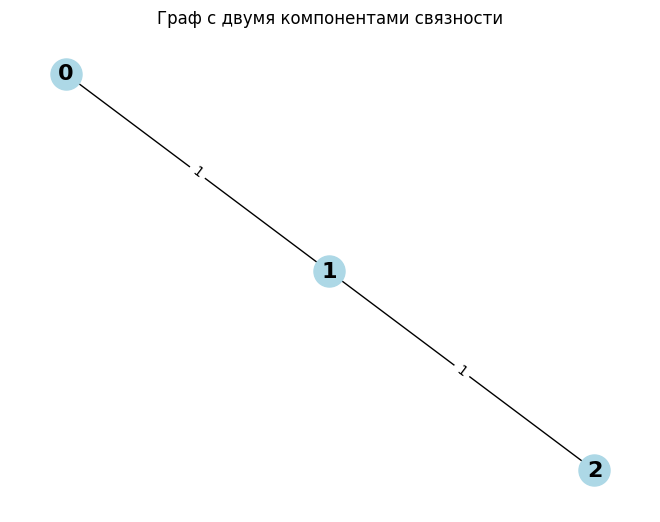

Матрица смежности A:
 [[0 1 0]
 [1 0 1]
 [0 1 0]]
Матрица степеней D:
 [[1 0 0]
 [0 2 0]
 [0 0 1]]
Лапласиан L:
 [[ 1 -1  0]
 [-1  2 -1]
 [ 0 -1  1]]
Собственные значения L:
 [ 3.00000000e+00  1.00000000e+00 -3.36770206e-17]
Собственные векторы L:
 [[-4.08248290e-01 -7.07106781e-01  5.77350269e-01]
 [ 8.16496581e-01  2.61239546e-16  5.77350269e-01]
 [-4.08248290e-01  7.07106781e-01  5.77350269e-01]]


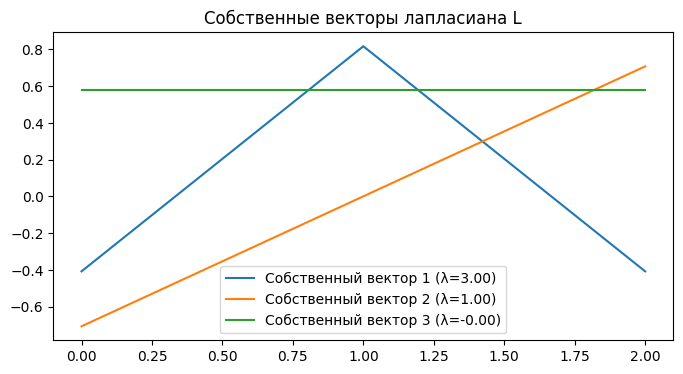

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Создаём граф
G = nx.Graph()

# Добавляем вершины и рёбра с весами
G.add_weighted_edges_from([(0, 1, 1), (1, 2, 1)])  # рёбра (0,1) и (1,2) с весом 1

# Визуализация графа
pos = nx.spring_layout(G)  # Позиции вершин для визуализации
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Граф с двумя компонентами связности")
plt.show()

# Матрица смежности
A = nx.adjacency_matrix(G).toarray()
print("Матрица смежности A:\n", A)

# Матрица степеней
D = np.diag(np.sum(A, axis=1))
print("Матрица степеней D:\n", D)

# Лапласиан
L = D - A
print("Лапласиан L:\n", L)

# Собственные значения и векторы лапласиана
eigenvalues, eigenvectors = np.linalg.eig(L)
print("Собственные значения L:\n", eigenvalues)
print("Собственные векторы L:\n", eigenvectors)

# Визуализация собственных векторов
plt.figure(figsize=(8, 4))
for i in range(len(eigenvectors)):
    plt.plot(eigenvectors[:, i], label=f"Собственный вектор {i+1} (λ={eigenvalues[i]:.2f})")
plt.title("Собственные векторы лапласиана L")
plt.legend()
plt.show()


Пример для теоремы 3 (Нормализованный лапласиан)





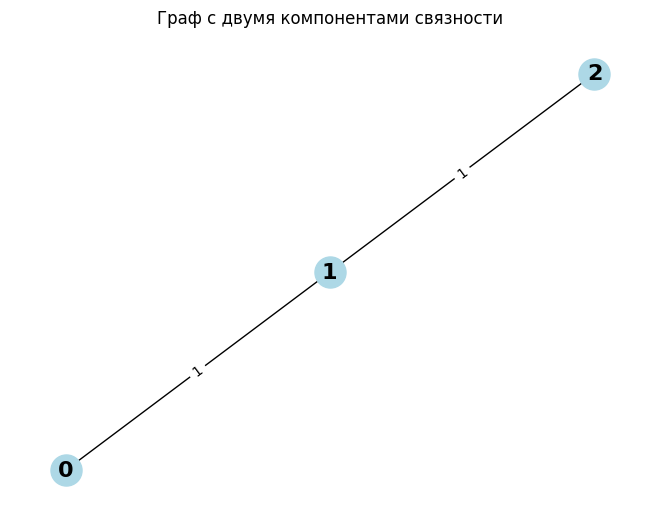

Матрица смежности A:
 [[0 1 0]
 [1 0 1]
 [0 1 0]]
Матрица степеней D:
 [[1 0 0]
 [0 2 0]
 [0 0 1]]
Нормализованный лапласиан L_sym:
 [[ 1.         -0.70710678  0.        ]
 [-0.70710678  1.         -0.70710678]
 [ 0.         -0.70710678  1.        ]]
Собственные значения L_sym:
 [-1.11022302e-16  1.00000000e+00  2.00000000e+00]
Собственные векторы L_sym:
 [[ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01 -5.46881247e-16 -7.07106781e-01]
 [ 5.00000000e-01  7.07106781e-01  5.00000000e-01]]


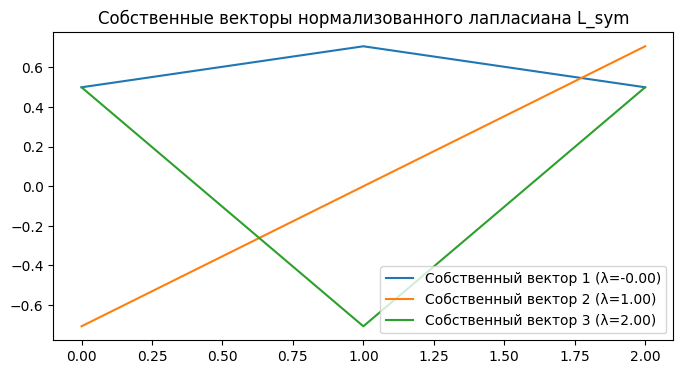

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Создаём граф
G = nx.Graph()

# Добавляем вершины и рёбра с весами
G.add_weighted_edges_from([(0, 1, 1), (1, 2, 1)])  # рёбра (0,1) и (1,2) с весом 1

# Визуализация графа
pos = nx.spring_layout(G)  # Позиции вершин для визуализации
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=16, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Граф с двумя компонентами связности")
plt.show()

# Матрица смежности
A = nx.adjacency_matrix(G).toarray()
print("Матрица смежности A:\n", A)

# Матрица степеней
D = np.diag(np.sum(A, axis=1))
print("Матрица степеней D:\n", D)

# Нормализованный лапласиан (симметричный)
D_sqrt_inv = np.diag(1 / np.sqrt(np.sum(A, axis=1)))
L_sym = D_sqrt_inv @ (D - A) @ D_sqrt_inv
print("Нормализованный лапласиан L_sym:\n", L_sym)

# Собственные значения и векторы нормализованного лапласиана
eigenvalues_sym, eigenvectors_sym = np.linalg.eig(L_sym)
print("Собственные значения L_sym:\n", eigenvalues_sym)
print("Собственные векторы L_sym:\n", eigenvectors_sym)

# Визуализация собственных векторов
plt.figure(figsize=(8, 4))
for i in range(len(eigenvectors_sym)):
    plt.plot(eigenvectors_sym[:, i], label=f"Собственный вектор {i+1} (λ={eigenvalues_sym[i]:.2f})")
plt.title("Собственные векторы нормализованного лапласиана L_sym")
plt.legend()
plt.show()